In [1]:
print("Setup Complete")

Setup Complete


In [2]:
DATA_PATH = '/kaggle/input/combinedatasetcsv/combine.dataset.csv'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Read the data
X_full = pd.read_csv(DATA_PATH)

# Drop irrelative columns
X_full = X_full.drop(columns=['rank', 'tconst', 'page'])

# Drop rows including na or invalid value
X_full = X_full.dropna()
X_full = X_full[X_full.runtime != '\\'+'N']
X_full = X_full[X_full.genres != str(['\\N'])]

# Convert dollar format to float
X_full[['worldwide']] = X_full[['worldwide']].replace('[\$,]','',regex=True).astype(float)

# Convert string format to int 
X_full[['runtime']] = X_full[['runtime']].astype(int)

# Convert string to list
X_full['genres'] = X_full['genres'].str[2:-2].str.split(',')

# Get X and y
features = ['year', 'title', 'imdbRate', 'runtime', 'genres', 'directors']
X = X_full[features]
y = X_full.worldwide

from sklearn.preprocessing import MultiLabelBinarizer

# Encode genres
mlb = MultiLabelBinarizer()
genres_df = pd.DataFrame(mlb.fit_transform(X['genres']),columns=mlb.classes_, index=X.index)
X = X.join(genres_df)
X = X.drop(columns=['genres'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0)

from sklearn.preprocessing import OneHotEncoder
object_cols = ['title', 'directors']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)


In [4]:
X_full.head()

,year,title,worldwide,imdbRate,runtime,genres,directors
0,2022,Top Gun: Maverick,1.486658e+09,8.4,130,"[Action, Drama]",['Joseph Kosinski']
1,2022,Jurassic World: Dominion,1.001136e+09,5.7,147,"[Action, Adventure, Sci-Fi]",['Colin Trevorrow']
2,2022,Doctor Strange in the Multiverse of Madness,9.557758e+08,6.9,126,"[Action, Adventure, Fantasy]",['Sam Raimi']
4,2022,The Batman,7.708362e+08,7.9,176,"[Action, Crime, Drama]",['Matt Reeves']
5,2022,Thor: Love and Thunder,7.609281e+08,6.3,118,"[Action, Adventure, Comedy]",['Taika Waititi']


In [5]:
X_full.to_csv('/kaggle/working/cleaned.dataset.csv')  

In [6]:
error_dict1 = {}
error_dict2 = {}
error_dict3 = {}
error_dict4 = {}
error_dict5 = {}
error_dict6 = {}

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 85350848.77856521
Mean Squared Error: 2.7580692814171464e+16
Root Mean Squared Error: 166074359.29176864
Sqaured Mean Error: 166074359.29
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 

R sqaured testing: 0.342


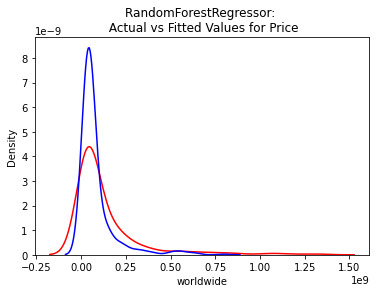

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
RF_model = RandomForestRegressor(n_estimators=50, random_state=0)

# Fit the model to the training data
RF_model.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = RF_model.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["RandomForestRegressor"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["RandomForestRegressor"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["RandomForestRegressor"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["RandomForestRegressor"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["RandomForestRegressor"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["RandomForestRegressor"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('RandomForestRegressor: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

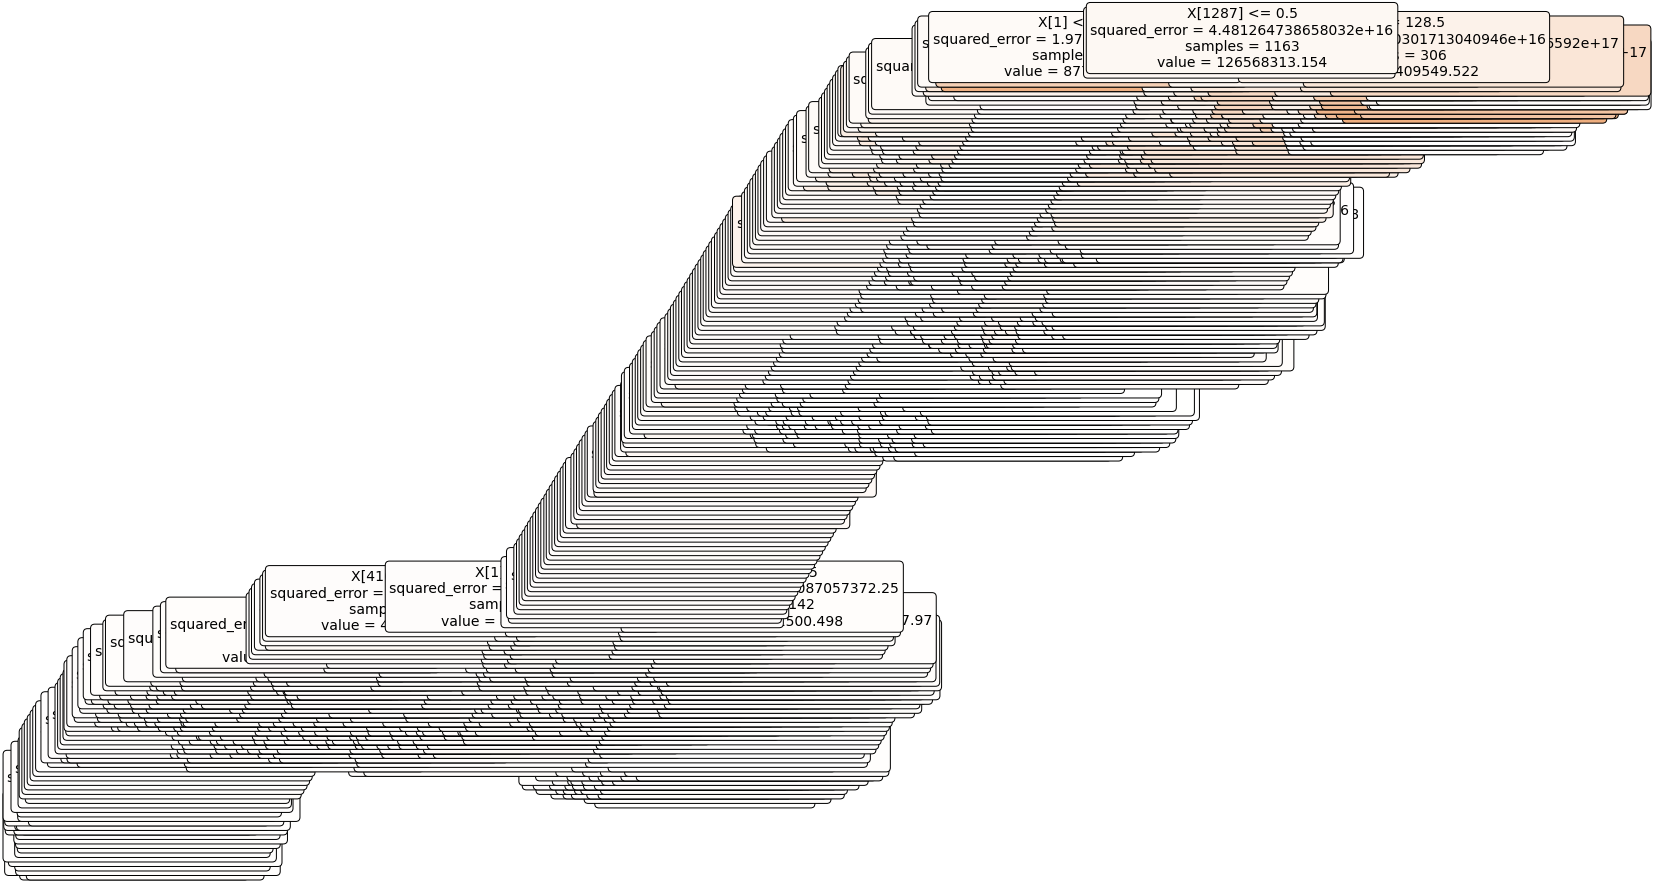

In [8]:
# Visualize the random forest 
import pydot
# Pull out one tree from the forest
Tree = RF_model.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 100099030.61825342
Mean Squared Error: 2.691193636581847e+16
Root Mean Squared Error: 164048579.28619337
Sqaured Mean Error: 164048579.29
R squared training: 0.9
R sqaured testing: 0.342


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 

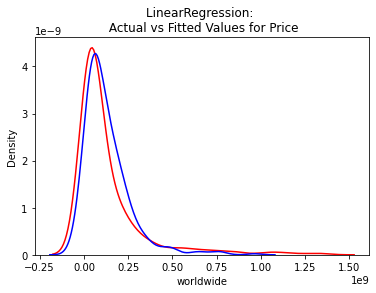

In [9]:
# Linear Regression 

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Define the model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = lr_model.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["LinearRegression"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["LinearRegression"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["LinearRegression"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["LinearRegression"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["LinearRegression"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["LinearRegression"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('LinearRegression: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 104308704.00112563
Mean Squared Error: 4.8256729916512504e+16
Root Mean Squared Error: 219674144.85212526
Sqaured Mean Error: 219674144.85
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


R sqaured testing: 0.342


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


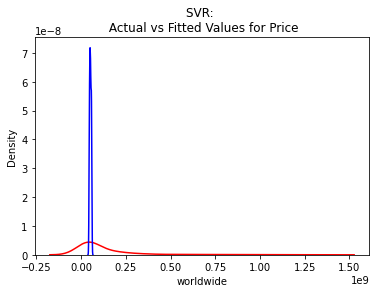

In [10]:
# SVM regressor

from sklearn.svm import SVR

# Define the model
svr = SVR(kernel = 'linear',C = 1000)

# Fit the model to the training data
svr.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = svr.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["SVR"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["SVR"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["SVR"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["SVR"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["SVR"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["SVR"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('SVR: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

Mean Absolute Error: 132274878.5152174
Mean Squared Error: 5.67234559977472e+16
Root Mean Squared Error: 238166865.8687585
Sqaured Mean Error: 238166865.87
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-l

R sqaured testing: 0.342


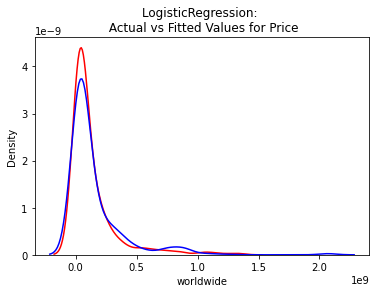

In [11]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()  

logmodel.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = logmodel.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["LogisticRegression"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["LogisticRegression"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["LogisticRegression"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["LogisticRegression"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["LogisticRegression"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["LogisticRegression"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('LogisticRegression: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 115191292.56304348
Mean Squared Error: 5.4566670073990904e+16
Root Mean Squared Error: 233595098.5658537
Sqaured Mean Error: 233595098.57
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-l

R sqaured testing: 0.342


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


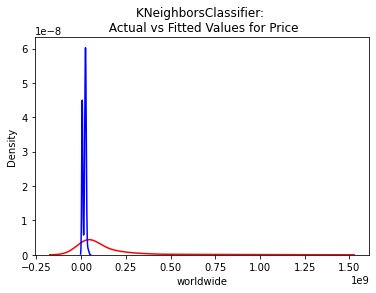

In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')

knn.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = knn.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["KNeighborsClassifier"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["KNeighborsClassifier"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["KNeighborsClassifier"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["KNeighborsClassifier"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["KNeighborsClassifier"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["KNeighborsClassifier"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('KNeighborsClassifier: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Mean Absolute Error: 100099030.61825342
Mean Squared Error: 2.691193636581847e+16
Root Mean Squared Error: 164048579.28619337
Sqaured Mean Error: 164048579.29
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 

R sqaured testing: 0.342


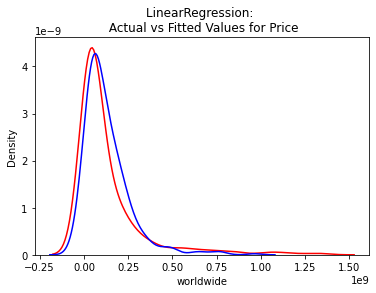

In [13]:
# Multiple regression
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = regr.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["LinearRegression"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["LinearRegression"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["LinearRegression"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["LinearRegression"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["LinearRegression"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["LinearRegression"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('LinearRegression: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

Mean Absolute Error: 96145194.12284818
Mean Squared Error: 2.7105891350214e+16
Root Mean Squared Error: 164638669.0611109
Sqaured Mean Error: 164638669.06
R squared training: 0.9
R sqaured testing: 0.342


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


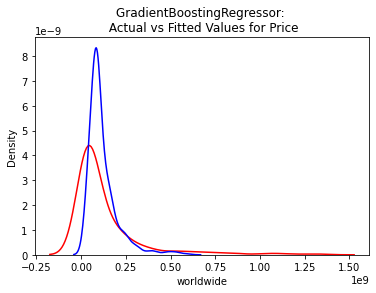

In [14]:
# Gradient Boosting Regression

# Multiple regression
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor()

gbr.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = gbr.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["GradientBoostingRegressor"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["GradientBoostingRegressor"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["GradientBoostingRegressor"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["GradientBoostingRegressor"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["GradientBoostingRegressor"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["GradientBoostingRegressor"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))

ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('GradientBoostingRegressor: \n Actual vs Fitted Values for Price')
plt.show()
plt.close()


Mean Absolute Error: 86341849.71616848
Mean Squared Error: 2.4992730296514628e+16
Root Mean Squared Error: 158090892.51602897
Sqaured Mean Error: 158090892.52
R squared training: 0.9


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


R sqaured testing: 0.342


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


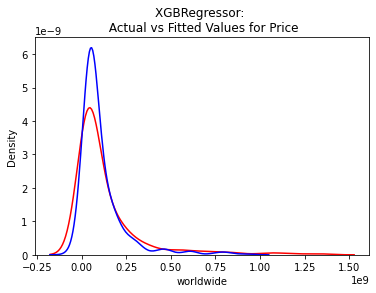

In [15]:
# xg boost

import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgb_model.fit(OH_X_train, y_train)

# Generate test predictions
preds_test = xgb_model.predict(OH_X_valid)

# Score the prediction
import sklearn.metrics as metrics
error_dict1["XGBRegressor"] = metrics.mean_absolute_error(y_valid, preds_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, preds_test)) 
error_dict2["XGBRegressor"] = metrics.mean_squared_error(y_valid, preds_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, preds_test)) 
mean_squared_error=metrics.mean_squared_error(y_valid, preds_test)
error_dict3["XGBRegressor"] = np.sqrt(metrics.mean_squared_error(y_valid, preds_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, preds_test)))
error_dict4["XGBRegressor"] = round(np.sqrt(mean_squared_error),2)
print('Sqaured Mean Error:', round(np.sqrt(mean_squared_error),2))
error_dict5["XGBRegressor"] = round(RF_model.score(OH_X_train,y_train),3)
print('R squared training:',round(RF_model.score(OH_X_train,y_train),3))
error_dict6["XGBRegressor"] = round(RF_model.score(OH_X_valid,y_valid),3)
print('R sqaured testing:',round(RF_model.score(OH_X_valid,y_valid),3))


ax = sns.distplot(y_valid, hist=False, color="r", label="Actual Value")
sns.distplot(preds_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('XGBRegressor: \n Actual vs Fitted Values for Price')
plt.show()

In [16]:
# Rank models according to Test set accuracy
print('Mean Absolute Error:')
sorted_error_dict1 = sorted(error_dict1.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict1:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1
print('Mean Absolute Error:')
sorted_error_dict2 = sorted(error_dict2.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict2:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1
print('Root Mean Squared Error:')
sorted_error_dict3 = sorted(error_dict3.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict3:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1
print('Sqaured Mean Error:')
sorted_error_dict4 = sorted(error_dict4.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict4:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1
print('R squared training:')
sorted_error_dict5 = sorted(error_dict5.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict5:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1
print('R sqaured testing:')
sorted_error_dict6 = sorted(error_dict6.items(), key = lambda kv: (-kv[1], kv[0]))
rank = 1
for kv in sorted_error_dict6:
    print("Rank " + str(rank) + ": " + kv[0] + ": " + str(kv[1]) + "\n")
    rank += 1

Mean Absolute Error:
Rank 1: LogisticRegression: 132274878.5152174

Rank 2: KNeighborsClassifier: 115191292.56304348

Rank 3: SVR: 104308704.00112563

Rank 4: LinearRegression: 100099030.61825342

Rank 5: GradientBoostingRegressor: 96145194.12284818

Rank 6: XGBRegressor: 86341849.71616848

Rank 7: RandomForestRegressor: 85350848.77856521

Mean Absolute Error:
Rank 1: LogisticRegression: 5.67234559977472e+16

Rank 2: KNeighborsClassifier: 5.4566670073990904e+16

Rank 3: SVR: 4.8256729916512504e+16

Rank 4: RandomForestRegressor: 2.7580692814171464e+16

Rank 5: GradientBoostingRegressor: 2.7105891350214e+16

Rank 6: LinearRegression: 2.691193636581847e+16

Rank 7: XGBRegressor: 2.4992730296514628e+16

Root Mean Squared Error:
Rank 1: LogisticRegression: 238166865.8687585

Rank 2: KNeighborsClassifier: 233595098.5658537

Rank 3: SVR: 219674144.85212526

Rank 4: RandomForestRegressor: 166074359.29176864

Rank 5: GradientBoostingRegressor: 164638669.0611109

Rank 6: LinearRegression: 16404